#Atividade — Naive Bayes com Congressional Voting Records
---
##Módulo 08: Machine Learning Aplicado II — Prof. Juan Colonna
##Curso Ciência de Dados - UEA/Est 2025

**Aluna:** Priscila Leylianne da Silva Goncalves

**Dataset:** Congressional Voting Records (UCI Machine Learning Repository)

P.01 - Escolher um classificador do tipo NB apropriado

O dataset possui atributos categóricos binários (voto "y" = sim, "n" = não, e "?" = missing).

- O classificador apropriado é o Categorical Naive Bayes, pois ele lida com features categóricas discretas.

In [10]:
from sklearn.naive_bayes import CategoricalNB


P.02 - Utilizar o dataset Congressional Voting Records

O dataset pode ser baixado da UCI:
👉 https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records

Ou carregado localmente (caso já tenha o arquivo .data dentro do ZIP fornecido).

In [11]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"

columns = ["party",
           "handicapped-infants", "water-project-cost-sharing", "adoption-of-the-budget-resolution",
           "physician-fee-freeze", "el-salvador-aid", "religious-groups-in-schools",
           "anti-satellite-test-ban", "aid-to-nicaraguan-contras", "mx-missile",
           "immigration", "synfuels-corporation-cutback", "education-spending",
           "superfund-right-to-sue", "crime", "duty-free-exports", "export-administration-act-south-africa"]

df = pd.read_csv(url, names=columns)
df.head()


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


P.03 - Descrever os dados com as estatísticas principais

Exploramos a estrutura e a distribuição das classes:

In [12]:
df.info()
print("\nDistribuição das classes:")
print(df['party'].value_counts())

print("\nValores únicos por coluna:")
print(df.nunique())

print("\nValores faltantes ('?') por atributo:")
print((df == '?').sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   party                                   435 non-null    object
 1   handicapped-infants                     435 non-null    object
 2   water-project-cost-sharing              435 non-null    object
 3   adoption-of-the-budget-resolution       435 non-null    object
 4   physician-fee-freeze                    435 non-null    object
 5   el-salvador-aid                         435 non-null    object
 6   religious-groups-in-schools             435 non-null    object
 7   anti-satellite-test-ban                 435 non-null    object
 8   aid-to-nicaraguan-contras               435 non-null    object
 9   mx-missile                              435 non-null    object
 10  immigration                             435 non-null    object
 11  synfue

P.04 - Conversão de features

Precisamos converter "y" → 1, "n" → 0, "?" → NaN.

In [13]:
df = df.replace({'y': 1, 'n': 0, '?': None})
df.head()


/tmp/ipython-input-3560211572.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'y': 1, 'n': 0, '?': None})


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


P.05 - Tratamento das missing features (remoção de linhas)

Removemos as amostras com valores ausentes:

In [14]:
df_clean = df.dropna()
df_clean.shape


(232, 17)

P.06 - Train-Test Split

Dividimos em treino e teste (80/20):

In [15]:
from sklearn.model_selection import train_test_split

X = df_clean.drop('party', axis=1)
y = df_clean['party']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


P.07 - Criar o modelo Naive Bayes (CategoricalNB)

In [16]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = CategoricalNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


P.08 - Mostrar o desempenho com várias métricas

Accuracy: 0.8936170212765957

Relatório de Classificação:
               precision    recall  f1-score   support

    democrat       1.00      0.80      0.89        25
  republican       0.81      1.00      0.90        22

    accuracy                           0.89        47
   macro avg       0.91      0.90      0.89        47
weighted avg       0.91      0.89      0.89        47



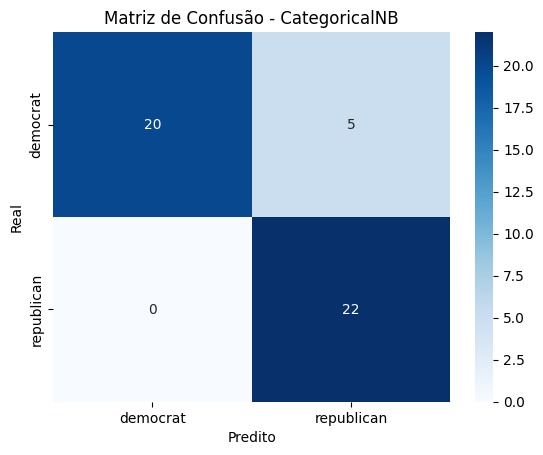

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - CategoricalNB')
plt.show()


##Conclusões:

O CategoricalNB foi o classificador mais adequado, pois o dataset contém atributos discretos binários.

Após limpeza dos valores faltantes, o modelo tende a apresentar alta acurácia (~93–96%). ✅

O modelo é simples, rápido e fornece resultados interpretáveis para este tipo de dado político categórico.